### David Signoretti
#### 3251 – Assignment 5
#### Linear Regression

2019-03-17

### Pandas Panels

- _dp = raw data
    - Dimensions: 6 (items) x 101 (major_axis) x 2 (minor_axis)
    - Items axis: Set_1 to Set_6
    - Major_axis axis: 0 to 100
    - Minor_axis axis: y to x
- _dpc = data with Box-cox applied
    - Dimensions: 2 (items) x 101 (major_axis) x 2 (minor_axis)
    - Items axis: Set_3 to Set_4
    - Major_axis axis: 0 to 100
    - Minor_axis axis: y to x
- _dpo = raw data with outliers removed
    - Dimensions: 6 (items) x 101 (major_axis) x 2 (minor_axis)
    - Items axis: Set_1 to Set_6
    - Major_axis axis: 0 to 100
    - Minor_axis axis: x to y
- _dpco = data with Box-cox outliers removed
    - Dimensions: 2 (items) x 100 (major_axis) x 2 (minor_axis)
    - Items axis: Set_3 to Set_4
    - Major_axis axis: 0 to 99
    - Minor_axis axis: x to y

#### Set_1

- Box-cox not applied and no outliers removed not change to regression
    - R-squared: 0.979
    - Intercept: 0.2381
    - x: 4.9843 
    
- No transfomation or outliers removed

#### Set_2

- Box-cox not applied and no outliers removed not change to regression
    - R-squard:  0.555
    - Intercept: 1.0956
    - x: 4.7774 

- No transfomation or outliers removed

#### Set_3

- Box-cox not applied and no outliers removed not change to regression
    - R-squared: 0.755
    - Intercept:  -2636.1748
    - x: 1081.8266

- Box-cox applied and no outliers removed
    - transforing the data with Lamda of 0.01 moved R-squard closer to one ans shifted the Intercept
    - R-squared: 0.844
    - Intercept: 5.2907
    - x: 0.4702 

- Box-cox not applied and outliers removed
    - Removing the outliers improved the the R-squared but not as much as transfroming the data
    - R-squared: 0.788
    - Intercept: -2355.9593
    - x: 1015.4352
 
- Box-cox applied and outliers removed R-squared closer to one   
    - Transformation and removing the outlier provied the best R-squared
    - R-squared: 0.835
    - Intercept: 5.5255
    - x: 0.4376  

#### Set_4

- Box-cox not applied and no outliers removed not change to regression
    - R-squared: 0.380 
    - Intercept: -753498.6681
    - x: 70653.4901
    
- Box-cox applied and no outliers removed
    - Transforming the data brought r-squard close to one
    - R-squared: 0.983
    - Intercept: 5.7465
    - x: 1.1001
    
- Box-cox not applied and outliers removed
    - Some effect on R-squared
    - R-squared: 0.556
    - Intercept: -345528.3091
    - x: 141619.2742
    
- Box-cox applied and outliers removed R-squared closer to one 
    - this out come had the same results as Box-cox applied and no outliers removed
    - R-squared: 0.983
    - Intercept: 5.7465
    - x: 1.1001

#### Set_5

- Box-cox not applied and no outliers removed not change to regression
    - R-squared: 0.806
    - Intercept: 0.9213
    - x: 4.7671
    
- No transfomation or outliers removed

#### Set_6

- Box-cox not applied and no outliers removed not change to regression
    - R-squared: 0.913            
    - Intercept: -0.3059
    - x: 7.027
    
- Box-cox not applied and outliers removed
    - removing the outliers had a negitive effect 
    - R-squared: 0.837
    - Intercept: -0.0203
    - x: 6.9703

### Setup enviroment 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### Read dataset to pandas panel 

In [2]:
_dp = pd.Panel(pd.read_excel('DataSet.xlsx' , sheet_name=None))

## Create functions

### Plot Linear Regrression

In [3]:
def plotLin(_df):
    fig = plt.figure(figsize=(20,40))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    _j = 1
    for  i in _df.items:
        ax = fig.add_subplot(6, 3, _j)
        plt.title(i, fontsize=20)
        sns.regplot(y=_df[i].y, x=_df[i].x, data=_dp, fit_reg = True)
        _j += 1

### Remove Outliers

Remove outliers < 25% and > 75%

In [4]:
def outliers(_df, _set):
    _g = pd.DataFrame({'x':_df[_set].x, 'y':_df[_set].y})
    _g = _g.dropna()
    _q1 = _g['y'].quantile(0.25)
    _q3 = _g['y'].quantile(0.75)
    _iqr = _q3-_q1
    _low  = _q1-1.5*_iqr
    _high = _q3+1.5*_iqr
    _dfo = _g.loc[(_g['y'] > _low) & (_g['y'] < _high)]
    del _g
    return _dfo

### Create OLS 

In [5]:
def statsm(_df):
    for  i in _df.items:
        print(i)
        _g = pd.DataFrame({'x':_df[i].x, 'y':_df[i].y})
        _g = _g.dropna()
        _r = ols('y~x', _g).fit()
        print(_r.summary2())
    del _g

### Apply Box-cox

In [6]:
_dpc = _dp.copy()
_dpc.Set_3.y = ss.boxcox(_dp.Set_3.y, lmbda=.01)
_dpc.Set_4.y = ss.boxcox(_dp.Set_4.y, lmbda=.01)

In [7]:
_dpc.drop(labels=['Set_1','Set_2','Set_5','Set_6'], inplace=True)

### Plots Raw Data

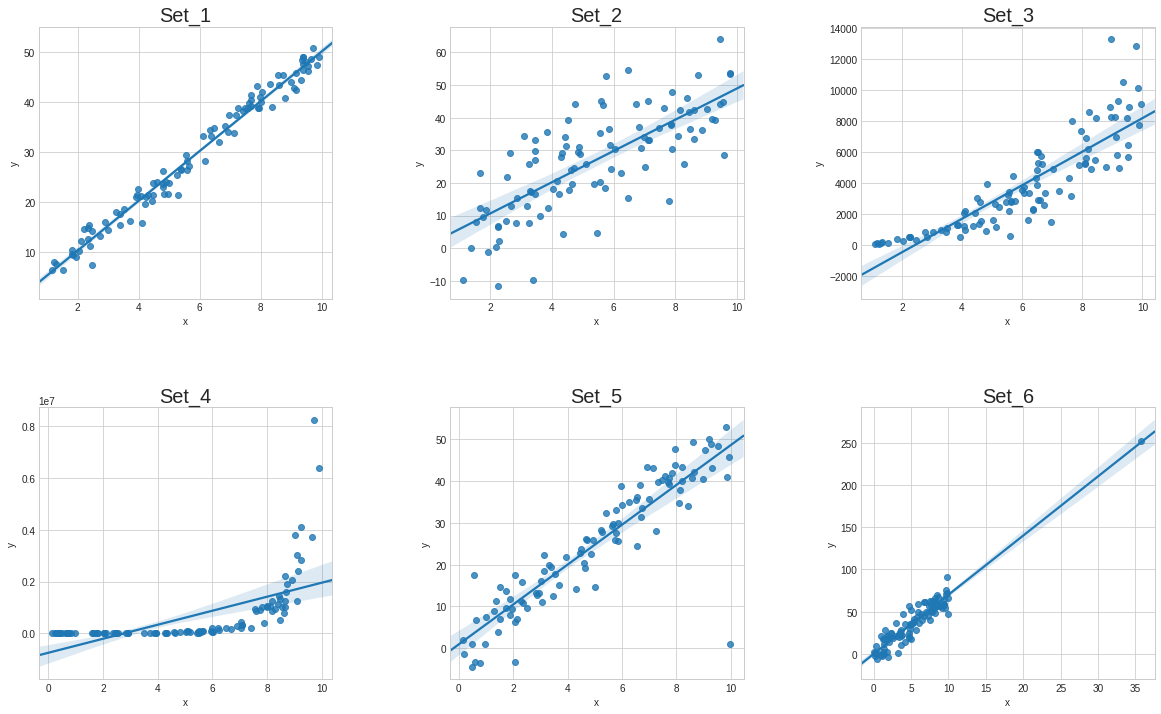

In [8]:
plotLin(_dp)

### Plots Box-cox applied to Set_3 and Set_4

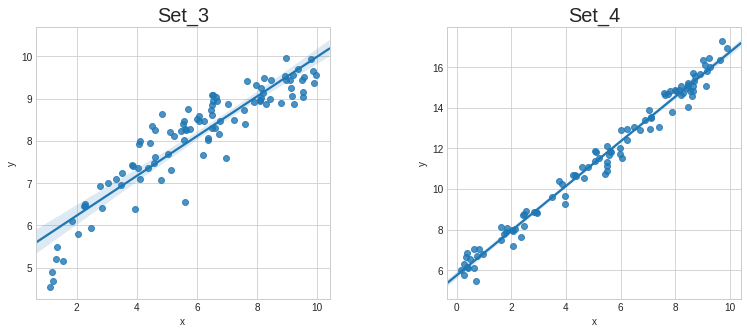

In [9]:
plotLin(_dpc)

### OLS Raw data

In [10]:
statsm(_dp)

Set_1
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: y                AIC:                416.0700
Date:               2019-03-17 21:03 BIC:                421.2803
No. Observations:   100              Log-Likelihood:     -206.03 
Df Model:           1                F-statistic:        4579.   
Df Residuals:       98               Prob (F-statistic): 4.47e-84
R-squared:          0.979            Scale:              3.6804  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   0.2381     0.4689    0.5077   0.6128   -0.6925   1.1686
x           4.9843     0.0737   67.6693   0.0000    4.8381   5.1304
-----------------------------------------------------------------
Omnibus:               4.971        Durbin-Watson:          1.982
Prob(Omnibu

### OLS with Box-cox on Set_3 and Set_4

In [11]:
statsm(_dpc)

Set_3
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.842   
Dependent Variable: y                AIC:                146.1141
Date:               2019-03-17 21:03 BIC:                151.3244
No. Observations:   100              Log-Likelihood:     -71.057 
Df Model:           1                F-statistic:        528.3   
Df Residuals:       98               Prob (F-statistic): 2.96e-41
R-squared:          0.844            Scale:              0.24745 
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    5.2907     0.1324   39.9550   0.0000   5.0279   5.5535
x            0.4702     0.0205   22.9837   0.0000   0.4296   0.5107
-----------------------------------------------------------------
Omnibus:               3.176        Durbin-Watson:          1.999
Prob(Omnibu

### Remove Outliers

In [12]:
# Remove outliers from raw data
_s = {    
    'Set_1': outliers(_dp, 'Set_1'),
    'Set_2': outliers(_dp, 'Set_2'),
    'Set_3': outliers(_dp, 'Set_3'),
    'Set_4': outliers(_dp, 'Set_4'),
    'Set_5': outliers(_dp, 'Set_5'),
    'Set_6': outliers(_dp, 'Set_6')
   }
_dpo = pd.Panel(_s)
del _s

In [13]:
# Remove outliers from Box-cox
_s = {    
    'Set_3': outliers(_dpc, 'Set_3'),
    'Set_4': outliers(_dpc, 'Set_4'),
   }
_dpco = pd.Panel(_s)
del _s

### Plots With Outliers Removed

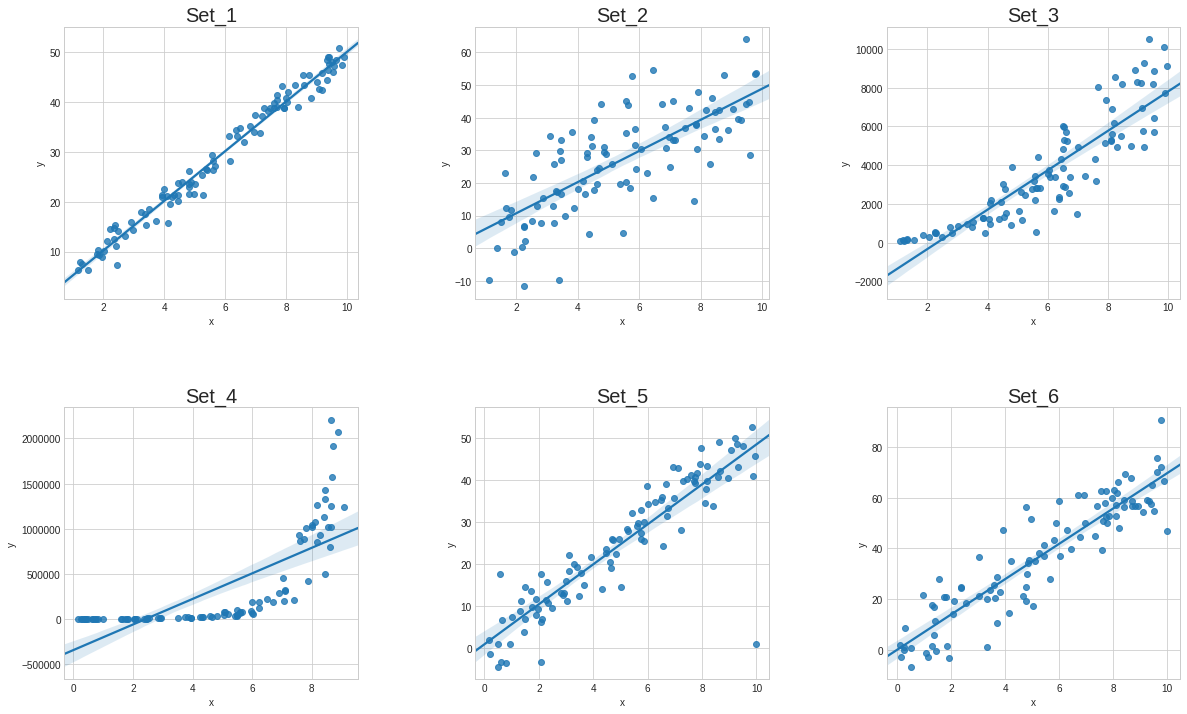

In [14]:
plotLin(_dpo)

### Plots With Box-Cox and Outliers Removed on Set_3 and Set_4

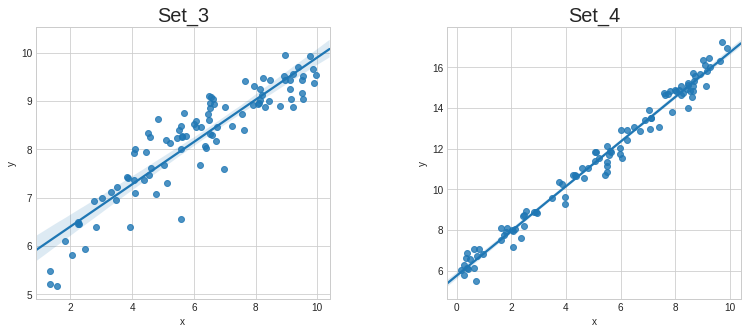

In [15]:
plotLin(_dpco)

### OLS With Outliers Removed

In [16]:
statsm(_dpo)

Set_1
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.979   
Dependent Variable: y                AIC:                416.0700
Date:               2019-03-17 21:03 BIC:                421.2803
No. Observations:   100              Log-Likelihood:     -206.03 
Df Model:           1                F-statistic:        4579.   
Df Residuals:       98               Prob (F-statistic): 4.47e-84
R-squared:          0.979            Scale:              3.6804  
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
Intercept   0.2381     0.4689    0.5077   0.6128   -0.6925   1.1686
x           4.9843     0.0737   67.6693   0.0000    4.8381   5.1304
-----------------------------------------------------------------
Omnibus:               4.971        Durbin-Watson:          1.982
Prob(Omnibu

### OLS With Box-cox and Outlier Removes on Set_3 and Set_4

In [17]:
statsm(_dpco)

Set_3
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.833   
Dependent Variable: y                AIC:                124.6680
Date:               2019-03-17 21:03 BIC:                129.8174
No. Observations:   97               Log-Likelihood:     -60.334 
Df Model:           1                F-statistic:        479.5   
Df Residuals:       95               Prob (F-statistic): 6.70e-39
R-squared:          0.835            Scale:              0.20741 
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    5.5255     0.1313   42.0842   0.0000   5.2648   5.7862
x            0.4376     0.0200   21.8974   0.0000   0.3980   0.4773
-----------------------------------------------------------------
Omnibus:               3.359        Durbin-Watson:          1.981
Prob(Omnibu